In [1]:
import time

import matplotlib.pyplot as plt 
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier as SKDecisionTreeClassifier, DecisionTreeRegressor as SKDecisionTreeRegressor

from decision_tree_classification import DecisionTreeClassifier
from decision_tree_regression import DecisionTreeRegression

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
def prepare_dataset(target: str) -> tuple:
	X, y = df.drop(columns=[target]), df[target]
	categorical_features = X.columns[(X.dtypes == object)]
	for c in X.columns:
		X[c] = X[c].sample(frac=0.8)
	
	for c in categorical_features:
		X[c] = LabelEncoder().fit_transform(X[c])
	
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
	return X_train, X_test, y_train, y_test

In [4]:
clf_X_train, clf_X_test, clf_y_train, clf_y_test = prepare_dataset('loan_status')
reg_X_train, reg_X_test, reg_y_train, reg_y_test = prepare_dataset('credit_score')

In [5]:
def test_classifier(instance):
	instance.fit(clf_X_train, clf_y_train)
	y_pred = instance.predict(clf_X_test)
	print('Classification Report')
	print(classification_report(clf_y_test, y_pred))
	print('Feature Importances')
	print(instance.feature_importances_)

In [6]:
def mse(y_true, y_pred):
	return ((y_true - y_pred) ** 2).mean()


def plot_regression(y_pred, y_true, lim=100):
	x = list(range(len(y_pred)))[:lim]
	plt.plot(x, y_pred[:lim], label='prediction')
	plt.plot(x, y_true[:lim], label='true')
	plt.legend()
	plt.show()


def test_regressor(instance):
	instance.fit(reg_X_train, reg_y_train)
	y_pred = instance.predict(reg_X_test)
	print('Mean Squared Error')
	print(mse(reg_y_test, y_pred))
	plot_regression(y_pred, reg_y_test)
	print('Feature Importances')
	print(instance.feature_importances_)

In [7]:
inf = 999999999
max_depth = 10
max_leafs = 40

In [8]:
classifiers = (
	('My implementation, without reduction (gini)', DecisionTreeClassifier(max_depth=inf, max_leafs=inf)),
	('My implementation, without reduction (donskoy)', DecisionTreeClassifier(max_depth=inf, max_leafs=inf, criterion='donskoy')),
	('My implementation, with reduction (gini)', DecisionTreeClassifier(max_depth=max_depth, max_leafs=max_leafs)),
	('My implementation, with reduction (donskoy)', DecisionTreeClassifier(max_depth=max_depth, max_leafs=max_leafs, criterion='donskoy')),
    ('SK implementation, without reduction (gini)', SKDecisionTreeClassifier()),
    ('SK implementation, with reduction (gini)', SKDecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leafs)),
)

for label, clf in classifiers:
	print(f'\t{label.upper()}')
	start = time.monotonic()
	test_classifier(clf)
	print('Time', time.monotonic() - start)

	MY IMPLEMENTATION, WITHOUT REDUCTION (GINI)
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     10540
           1       0.70      0.62      0.66      2960

    accuracy                           0.86     13500
   macro avg       0.80      0.77      0.78     13500
weighted avg       0.85      0.86      0.85     13500

Feature Importances
[0.0200935  0.0074335  0.00610493 0.04389581 0.00834963 0.0203824
 0.00872825 0.01054937 0.06019897 0.05512853 0.00618735 0.01814878
 0.08091834]
Time 48.36433649994433
	MY IMPLEMENTATION, WITHOUT REDUCTION (DONSKOY)
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     10540
           1       0.69      0.57      0.63      2960

    accuracy                           0.85     13500
   macro avg       0.79      0.75      0.77     13500
weighted avg       0.84      0.85      0.84     13500

Feature Importances


	My implementation, without reduction
Mean Squared Error
4707.944962962963


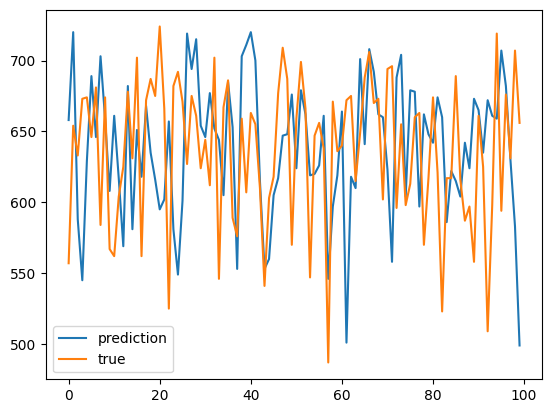

Feature Importances
[349.49204324 113.81521822 146.59658602 402.61165033 211.70835538
  90.96998827 280.45634588 140.19650919 372.13872717 167.97762242
 145.80484423  81.46280831  39.22302874]
Time 166.56042662495747
	My implementation, with reduction
Mean Squared Error
2519.525697769365


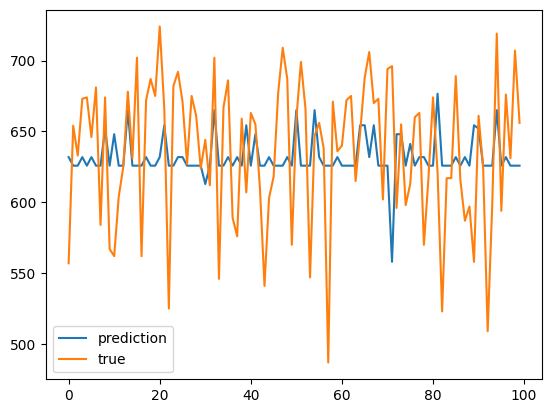

Feature Importances
[1.66825580e+01 9.37910336e-03 1.50559182e+01 9.68337144e+00
 5.28568593e+00 0.00000000e+00 3.10346493e+00 1.49670394e+00
 8.10176991e+00 4.98286231e+00 6.86373205e-01 6.00943985e+01
 3.15552285e+01]
Time 14.735306750051677
	SK implementation, without reduction
Mean Squared Error
4951.959703703704


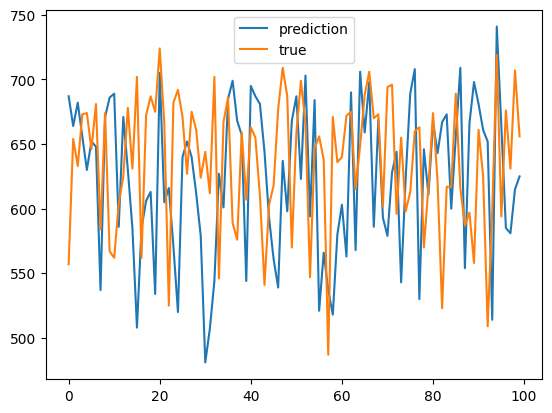

Feature Importances
[0.08906307 0.0311619  0.03906307 0.16370387 0.07852375 0.03431557
 0.13048139 0.06194393 0.14031801 0.11270026 0.07465834 0.02875812
 0.01530871]
Time 0.2719174171797931
	SK implementation, with reduction
Mean Squared Error
2370.9407448767315


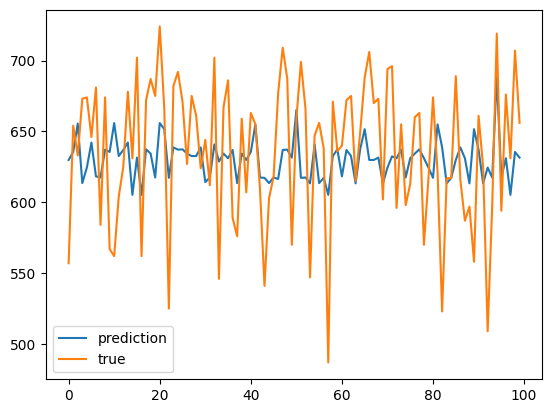

Feature Importances
[0.06657801 0.         0.31524352 0.         0.22601324 0.
 0.         0.         0.0094517  0.         0.01125514 0.2762607
 0.09519768]
Time 0.1246047499589622


In [9]:
regressors = (
	('My implementation, without reduction', DecisionTreeRegression(max_depth=inf, max_leafs=inf)),
	('My implementation, with reduction', DecisionTreeRegression(max_depth=max_depth, max_leafs=max_leafs)),
    ('SK implementation, without reduction', SKDecisionTreeRegressor()),
    ('SK implementation, with reduction', SKDecisionTreeRegressor(max_depth=max_depth, max_leaf_nodes=max_leafs)),
)

for label, reg in regressors:
	print(f'\t{label}')
	start = time.monotonic()
	test_regressor(reg)
	print('Time', time.monotonic() - start)